In [16]:
import rasterio
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from PIL import Image
from scipy.stats import pearsonr
from colorama import Fore
from rasterio.features import geometry_mask
from shapely.geometry import Polygon, mapping

## Jeu avec les données

In [19]:
gdf=gpd.read_file("Base_De_Donnees.gpkg")
#print(gdf)

In [20]:
# Ouvrir le fichier raster avec rasterio
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20200520-105859-615_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq', 'r') as rst:
    # Extraire les valeurs du raster pour chaque point de la couche géométrique
    liste=[]
    for index, row in gdf.iterrows():
        # Extraire les coordonnées du point
        multipolygon= row['geometry']
        # Extraire les valeurs du raster pour le point
        vals = rst.sample([(multipolygon)])
        liste.append(multipolygon)
        
        # Afficher les valeurs extraites
        # print(f"Point {index+1} - Coordonnées : ({position}) - Valeurs : {vals}")

print(multipolygon)
print(liste)
print(len(multipolygon.geoms))
polygon=multipolygon.geoms[0]
coords=polygon.exterior.coords
print("")
print(coords)

MULTIPOLYGON (((450239.9959124512 4795490.0039624525, 450260.28108531 4795489.743895806, 450259.8866220774 4795469.593006086, 450240.0044670404 4795469.853243241, 450239.9959124512 4795490.0039624525)))
[<MULTIPOLYGON (((450649.457 4795630.721, 450640.192 4795630.637, 450640.31 4...>, <MULTIPOLYGON (((450620.264 4795760.111, 450660.13 4795760.011, 450659.599 4...>, <MULTIPOLYGON (((450459.914 4795840.194, 450460.082 4795860.069, 450479.956 ...>, <MULTIPOLYGON (((450300.126 4795880.101, 450320.001 4795879.807, 450320.009 ...>, <MULTIPOLYGON (((450469.725 4795590.613, 450469.6 4795599.753, 450489.82 479...>, <MULTIPOLYGON (((450429.704 4795580.121, 450420.189 4795580.159, 450420.05 4...>, <MULTIPOLYGON (((450280.266 4795660.23, 450280.197 4795679.863, 450299.951 4...>, <MULTIPOLYGON (((450240.048 4795700.063, 450260.216 4795700.013, 450260.176 ...>, <MULTIPOLYGON (((450319.935 4795580.234, 450320.161 4795600.167, 450339.977 ...>, <MULTIPOLYGON (((450179.829 4795519.897, 450170.357 479552

## Calculs NDVI, PSRI et IRECI

In [21]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20200520-105859-615_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq') as src:
    # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    coordpixel_20_spring=[]
    bande_rouge_20_spring=[]
    bande_verte_20_spring=[]
    bande_infrarouge_20_spring=[]
    bande_RE1_20_spring=[]
    bande_RE2_20_spring=[]
    for i in range(len(liste)):
        poly=gdf.iloc[i]['geometry'].geoms[0]
        poly_transformed = mapping(poly)
        # Convertir le polygone en coordonnées de pixels
        poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
        coordpixel_20_spring.append(np.where(poly_pixels==True))
        # Lire les valeurs de pixels à l'intérieur du polygone      
        image = src.read(3, masked=True)
        pixels_inside_poly = image[poly_pixels]
        bande_rouge_20_spring.append(pixels_inside_poly)
        
        image2 = src.read(7, masked=True)
        pixels_inside_poly2 = image2[poly_pixels]
        bande_infrarouge_20_spring.append(pixels_inside_poly2)
        
        image3 = src.read(2, masked=True)
        pixels_inside_poly3 = image3[poly_pixels]
        bande_verte_20_spring.append(pixels_inside_poly3)

        image4 = src.read(5, masked=True)
        pixels_inside_poly4 = image4[poly_pixels]
        bande_RE1_20_spring.append(pixels_inside_poly4)
        
        image5 = src.read(6, masked=True)
        pixels_inside_poly5 = image5[poly_pixels]
        bande_RE2_20_spring.append(pixels_inside_poly5)

In [22]:
with rasterio.open('DATA_S2_extrait/SENTINEL2A_20160521-105553-553_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq') as src:
    # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    coordpixel_16_spring=[]
    bande_rouge_16_spring=[]
    bande_infrarouge_16_spring=[]
    bande_verte_16_spring=[]
    bande_RE1_16_spring=[]
    bande_RE2_16_spring=[]
    for i in range(len(liste)):
        poly=gdf.iloc[i]['geometry'].geoms[0]
        poly_transformed = mapping(poly)
        # Convertir le polygone en coordonnées de pixels
        poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
        coordpixel_16_spring.append(np.where(poly_pixels==True))
        # Lire les valeurs de pixels à l'intérieur du polygone
        image = src.read(3, masked=True)
        pixels_inside_poly = image[poly_pixels]
        bande_rouge_16_spring.append(pixels_inside_poly)
        
        image2 = src.read(7, masked=True) 
        pixels_inside_poly2 = image2[poly_pixels]
        bande_infrarouge_16_spring.append(pixels_inside_poly2)
        
        image3 = src.read(2, masked=True)
        pixels_inside_poly3 = image3[poly_pixels]
        bande_verte_16_spring.append(pixels_inside_poly3)
        
        image4 = src.read(5, masked=True)
        pixels_inside_poly4 = image4[poly_pixels]
        bande_RE1_16_spring.append(pixels_inside_poly4)
        
        image5 = src.read(6, masked=True)
        pixels_inside_poly5 = image5[poly_pixels]
        bande_RE2_16_spring.append(pixels_inside_poly5)

In [23]:
with rasterio.open('SENTINEL2A_20200825-104903-378_L2A_T31TDJ_C_V2-2_FRE_extrait_stack_gain.bsq') as src:
    # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    coordpixel_20_summer=[]
    bande_rouge_20_summer=[]
    bande_verte_20_summer=[]
    bande_infrarouge_20_summer=[]
    bande_RE1_20_summer=[]
    bande_RE2_20_summer=[]
    for i in range(len(liste)):
        poly=gdf.iloc[i]['geometry'].geoms[0]
        poly_transformed = mapping(poly)
        # Convertir le polygone en coordonnées de pixels
        poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
        coordpixel_20_summer.append(np.where(poly_pixels==True))
        # Lire les valeurs de pixels à l'intérieur du polygone
        image = src.read(3, masked=True)
        pixels_inside_poly = image[poly_pixels]
        bande_rouge_20_summer.append(pixels_inside_poly)
        
        image2 = src.read(7, masked=True)
        pixels_inside_poly2 = image2[poly_pixels]
        bande_infrarouge_20_summer.append(pixels_inside_poly2)
        
        image3 = src.read(2, masked=True)
        pixels_inside_poly3 = image3[poly_pixels]
        bande_verte_20_summer.append(pixels_inside_poly3)

        image4 = src.read(5, masked=True)
        pixels_inside_poly4 = image4[poly_pixels]
        bande_RE1_20_summer.append(pixels_inside_poly4)
        
        image5 = src.read(6, masked=True)
        pixels_inside_poly5 = image5[poly_pixels]
        bande_RE2_20_summer.append(pixels_inside_poly5)

In [24]:
with rasterio.open("SENTINEL2A_20160826-104023-461_L2A_T31TDJ_D_V1-1_FRE_extrait_stack_gain.bsq") as src:
     # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    coordpixel_16_summer=[]
    bande_rouge_16_summer=[]
    bande_infrarouge_16_summer=[]
    bande_verte_16_summer=[]
    bande_RE1_16_summer=[]
    bande_RE2_16_summer=[]
    for i in range(len(liste)):
        poly=gdf.iloc[i]['geometry'].geoms[0]
        poly_transformed = mapping(poly)
        # Convertir le polygone en coordonnées de pixels
        poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
        coordpixel_16_summer.append(np.where(poly_pixels==True))
        # Lire les valeurs de pixels à l'intérieur du polygone
        image = src.read(3, masked=True)
        pixels_inside_poly = image[poly_pixels]
        bande_rouge_16_summer.append(pixels_inside_poly)
        
        image2 = src.read(7, masked=True)  
        pixels_inside_poly2 = image2[poly_pixels]
        bande_infrarouge_16_summer.append(pixels_inside_poly2)
        
        image3 = src.read(2, masked=True)
        pixels_inside_poly3 = image3[poly_pixels]
        bande_verte_16_summer.append(pixels_inside_poly3)
        
        image4 = src.read(5, masked=True)
        pixels_inside_poly4 = image4[poly_pixels]
        bande_RE1_16_summer.append(pixels_inside_poly4)
        
        image5 = src.read(6, masked=True)
        pixels_inside_poly5 = image5[poly_pixels]
        bande_RE2_16_summer.append(pixels_inside_poly5)


In [25]:
with rasterio.open("SENTINEL2A_20170516-105322-634_L2A_T31TDJ_D_V1-4_FRE_extrait_stack_gain.bsq") as src:
     # Extraire les métadonnées de l'image
    transform = src.transform
    height = src.height
    width = src.width
    coordpixel_17_spring=[]
    bande_rouge_17_spring=[]
    bande_infrarouge_17_spring=[]
    bande_verte_17_spring=[]
    bande_RE1_17_spring=[]
    bande_RE2_17_spring=[]
    for i in range(len(liste)):
        poly=gdf.iloc[i]['geometry'].geoms[0]
        poly_transformed = mapping(poly)
        # Convertir le polygone en coordonnées de pixels
        poly_pixels = rasterio.features.geometry_mask([poly_transformed], out_shape=(height, width), transform=transform, invert=True)
        coordpixel_17_spring.append(np.where(poly_pixels==True))
        # Lire les valeurs de pixels à l'intérieur du polygone     
        image = src.read(3, masked=True)
        pixels_inside_poly = image[poly_pixels]
        bande_rouge_17_spring.append(pixels_inside_poly)
        
        image2 = src.read(7, masked=True) 
        pixels_inside_poly2 = image2[poly_pixels]
        bande_infrarouge_17_spring.append(pixels_inside_poly2)
        
        image3 = src.read(2, masked=True)
        pixels_inside_poly3 = image3[poly_pixels]
        bande_verte_17_spring.append(pixels_inside_poly3)
        
        image4 = src.read(5, masked=True)
        pixels_inside_poly4 = image4[poly_pixels]
        bande_RE1_17_spring.append(pixels_inside_poly4)
        
        image5 = src.read(6, masked=True)
        pixels_inside_poly5 = image5[poly_pixels]
        bande_RE2_17_spring.append(pixels_inside_poly5)


## Affichages corrélations NDVI, PSRI et IRECI

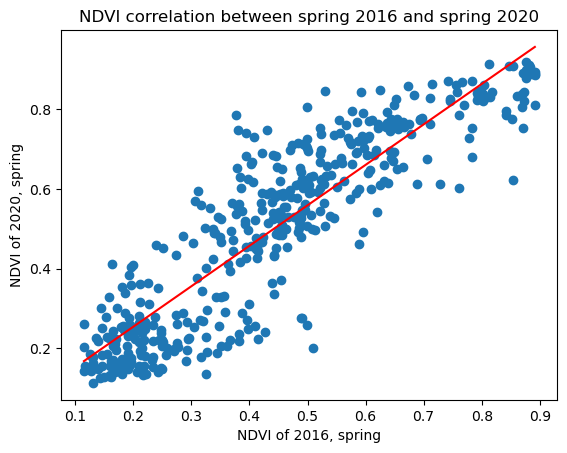

La corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020 est : 0.89


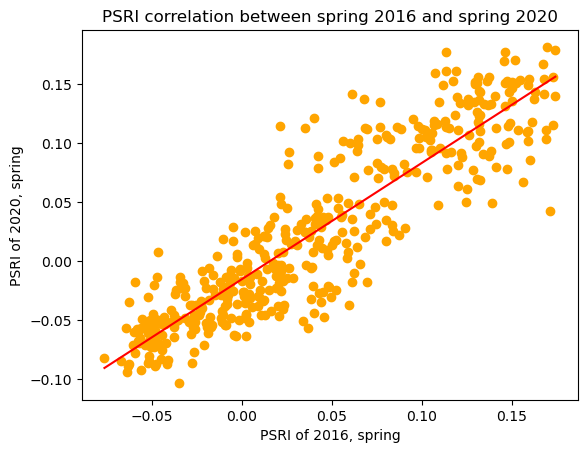

La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020 est : 0.9


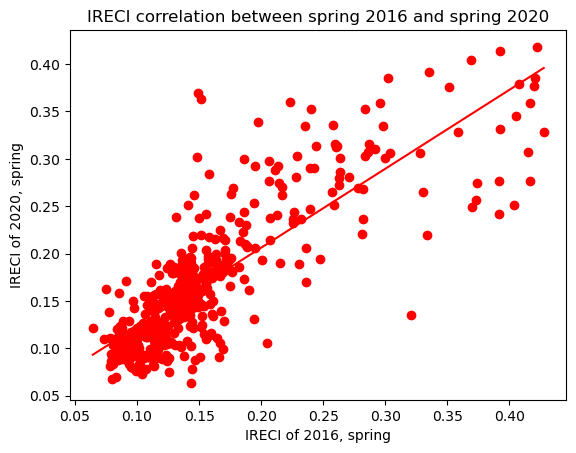

La corrélation entre la liste des coefficient IRECI de 2016 et la liste des coefficient IRECI de 2020 est : 0.819


In [34]:
ndvi_16_spring=[]
ndvi_20_spring=[]
PSRI_20_spring=[]
PSRI_16_spring=[]
IRECI_16_spring=[]
IRECI_20_spring=[]
for i in range(len(liste)):
    for j in range(len(bande_rouge_20_spring[i])):
        ndvi_16_spring.append((bande_infrarouge_16_spring[i][j] - bande_rouge_16_spring[i][j]) / (bande_infrarouge_16_spring[i][j] + bande_rouge_16_spring[i][j]))
        ndvi_20_spring.append((bande_infrarouge_20_spring[i][j] - bande_rouge_20_spring[i][j]) / (bande_infrarouge_20_spring[i][j] + bande_rouge_20_spring[i][j]))
        PSRI_20_spring.append((bande_rouge_20_spring[i][j]-bande_verte_20_spring[i][j])/bande_infrarouge_20_spring[i][j])
        PSRI_16_spring.append((bande_rouge_16_spring[i][j]-bande_verte_16_spring[i][j])/bande_infrarouge_16_spring[i][j])
        IRECI_20_spring.append((bande_infrarouge_20_spring[i][j] - bande_rouge_20_spring[i][j])/(bande_RE1_20_spring[i][j]/bande_RE2_20_spring[i][j]))
        IRECI_16_spring.append((bande_infrarouge_16_spring[i][j] - bande_rouge_16_spring[i][j])/(bande_RE1_16_spring[i][j]/bande_RE2_16_spring[i][j]))

Corr_matrixNDVI=np.corrcoef(ndvi_16_spring,ndvi_20_spring)
Corr_matrixPSRI=np.corrcoef(PSRI_16_spring,PSRI_20_spring)
Corr_matrixIRECI=np.corrcoef(IRECI_16_spring,IRECI_20_spring)

ndvi_16_spring=np.array(ndvi_16_spring)
ndvi_20_spring=np.array(ndvi_20_spring)
coefficients_ndvi_16_20 = np.polyfit(ndvi_16_spring, ndvi_20_spring, 1)
x_reg_ndvi_16_20 = np.linspace(ndvi_16_spring.min(), ndvi_16_spring.max(), len(ndvi_16_spring))
y_reg_ndvi_16_20 = np.polyval(coefficients_ndvi_16_20, x_reg_ndvi_16_20)

plt.scatter(ndvi_16_spring,ndvi_20_spring)
plt.plot(x_reg_ndvi_16_20, y_reg_ndvi_16_20, color='r')
plt.xlabel('NDVI of 2016, spring')
plt.ylabel('NDVI of 2020, spring')
plt.title('NDVI correlation between spring 2016 and spring 2020')
plt.show()
CorrNDVI=round(Corr_matrixNDVI[0,1],3)
print("La corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020 est :", CorrNDVI)

PSRI_16_spring=np.array(PSRI_16_spring)
PSRI_20_spring=np.array(PSRI_20_spring)
coefficients_psri_16_20 = np.polyfit(PSRI_16_spring, PSRI_20_spring, 1)
x_reg_PSRI_16_20 = np.linspace(PSRI_16_spring.min(), PSRI_16_spring.max(), len(PSRI_16_spring))
y_reg_PSRI_16_20 = np.polyval(coefficients_psri_16_20, x_reg_PSRI_16_20)

plt.scatter(PSRI_16_spring,PSRI_20_spring,c='orange')
plt.plot(x_reg_PSRI_16_20, y_reg_PSRI_16_20, color='r')
plt.xlabel('PSRI of 2016, spring')
plt.ylabel('PSRI of 2020, spring')
plt.title('PSRI correlation between spring 2016 and spring 2020')
plt.show()
CorrPSRI=round(Corr_matrixPSRI[0,1],3)
print("La corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020 est :", CorrPSRI)

IRECI_16_spring=np.array(IRECI_16_spring)
IRECI_20_spring=np.array(IRECI_20_spring)
coefficients_IRECI_16_20 = np.polyfit(IRECI_16_spring, IRECI_20_spring, 1)
x_reg_IRECI_16_20 = np.linspace(IRECI_16_spring.min(), IRECI_16_spring.max(), len(IRECI_16_spring))
y_reg_IRECI_16_20 = np.polyval(coefficients_IRECI_16_20, x_reg_IRECI_16_20)

plt.scatter(IRECI_16_spring,IRECI_20_spring,c='red')
plt.plot(x_reg_IRECI_16_20, y_reg_IRECI_16_20, color='r')
plt.xlabel('IRECI of 2016, spring')
plt.ylabel('IRECI of 2020, spring')
plt.title('IRECI correlation between spring 2016 and spring 2020')
plt.show()
CorrIRECI=round(Corr_matrixIRECI[0,1],3)
print("La corrélation entre la liste des coefficient IRECI de 2016 et la liste des coefficient IRECI de 2020 est :", CorrIRECI)

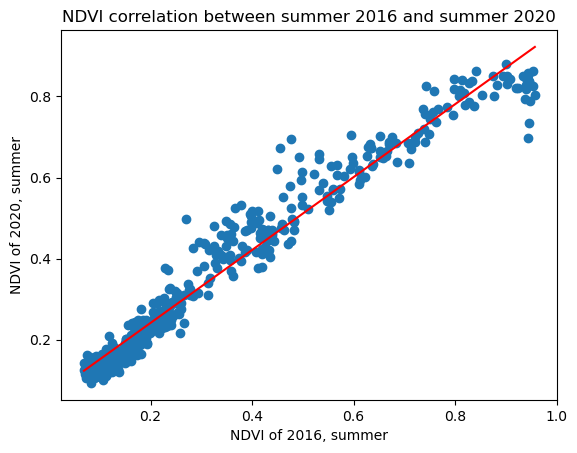

Pour la seconde saison, la corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020 est : 0.979


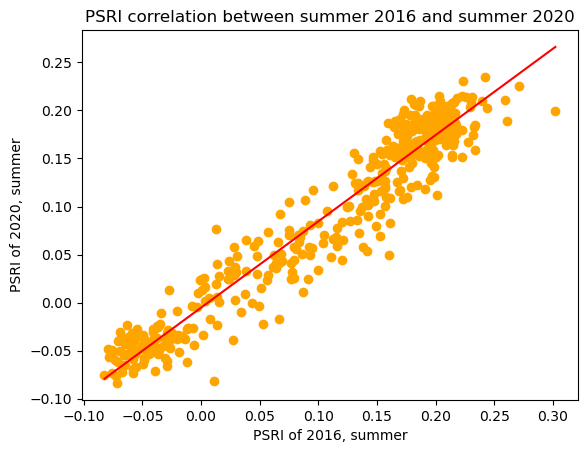

Pour la seconde saison, la corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020 est : 0.964


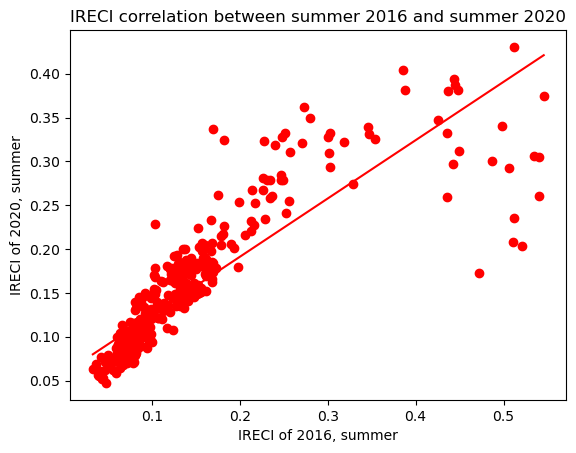

Pour la seconde saison, la corrélation entre la liste des coefficient IRECI de 2016 et la liste des coefficient IRECI de 2020 est : 0.863


In [35]:
ndvi_16_summer=[]
ndvi_20_summer=[]
PSRI_20_summer=[]
PSRI_16_summer=[]
IRECI_16_summer=[]
IRECI_20_summer=[]
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_summer[i])):
        ndvi_16_summer.append( (bande_infrarouge_16_summer[i][j] - bande_rouge_16_summer[i][j]) / (bande_infrarouge_16_summer[i][j] + bande_rouge_16_summer[i][j]))
        ndvi_20_summer.append((bande_infrarouge_20_summer[i][j] - bande_rouge_20_summer[i][j]) / (bande_infrarouge_20_summer[i][j] + bande_rouge_20_summer[i][j]))
        PSRI_20_summer.append((bande_rouge_20_summer[i][j]-bande_verte_20_summer[i][j])/bande_infrarouge_20_summer[i][j])
        PSRI_16_summer.append((bande_rouge_16_summer[i][j]-bande_verte_16_summer[i][j])/bande_infrarouge_16_summer[i][j])
        IRECI_20_summer.append((bande_infrarouge_20_summer[i][j] - bande_rouge_20_summer[i][j])/(bande_RE1_20_summer[i][j]/bande_RE2_20_summer[i][j]))
        IRECI_16_summer.append((bande_infrarouge_16_summer[i][j] - bande_rouge_16_summer[i][j])/(bande_RE1_16_summer[i][j]/bande_RE2_16_summer[i][j]))
ndvi_16_summer=np.array(ndvi_16_summer)
ndvi_20_summer=np.array(ndvi_20_summer)
coefficients_ndvi_16_20_summer = np.polyfit(ndvi_16_summer, ndvi_20_summer, 1)

x_reg_ndvi_16_20_summer = np.linspace(ndvi_16_summer.min(), ndvi_16_summer.max(), len(ndvi_16_summer))
y_reg_ndvi_16_20_summer = np.polyval(coefficients_ndvi_16_20_summer, x_reg_ndvi_16_20_summer)

Corr_matrixNDVI_2=np.corrcoef(ndvi_16_summer,ndvi_20_summer)
Corr_matrixPSRI_2=np.corrcoef(PSRI_16_summer,PSRI_20_summer)
Corr_matrixIRECI_2=np.corrcoef(IRECI_16_summer,IRECI_20_summer)

plt.scatter(ndvi_16_summer,ndvi_20_summer)
plt.plot(x_reg_ndvi_16_20_summer, y_reg_ndvi_16_20_summer, color='r')
plt.xlabel('NDVI of 2016, summer')
plt.ylabel('NDVI of 2020, summer')
plt.title('NDVI correlation between summer 2016 and summer 2020')
plt.show()
CorrNDVI_2=round(Corr_matrixNDVI_2[0,1],3)
print("Pour la seconde saison, la corrélation entre la liste des coefficient NDVI de 2016 et la liste des coefficient NDVI de 2020 est :", CorrNDVI_2)

PSRI_16_summer=np.array(PSRI_16_summer)
PSRI_20_summer=np.array(PSRI_20_summer)
coefficients_psri_16_20_summer = np.polyfit(PSRI_16_summer, PSRI_20_summer, 1)
x_reg_PSRI_16_20_summer = np.linspace(PSRI_16_summer.min(), PSRI_16_summer.max(), len(PSRI_16_summer))
y_reg_PSRI_16_20_summer = np.polyval(coefficients_psri_16_20_summer, x_reg_PSRI_16_20_summer)

plt.scatter(PSRI_16_summer,PSRI_20_summer,c='orange')
plt.plot(x_reg_PSRI_16_20_summer, y_reg_PSRI_16_20_summer, color='r')
plt.xlabel('PSRI of 2016, summer')
plt.ylabel('PSRI of 2020, summer')
plt.title('PSRI correlation between summer 2016 and summer 2020')
plt.show()
CorrPSRI_2=round(Corr_matrixPSRI_2[0,1],3)
print("Pour la seconde saison, la corrélation entre la liste des coefficient PSRI de 2016 et la liste des coefficient PSRI de 2020 est :", CorrPSRI_2)

IRECI_16_summer=np.array(IRECI_16_summer)
IRECI_20_summer=np.array(IRECI_20_summer)
coefficients_IRECI_16_20_summer = np.polyfit(IRECI_16_summer, IRECI_20_summer, 1)
x_reg_IRECI_16_20_summer = np.linspace(IRECI_16_summer.min(), IRECI_16_summer.max(), len(IRECI_16_summer))
y_reg_IRECI_16_20_summer = np.polyval(coefficients_IRECI_16_20_summer, x_reg_IRECI_16_20_summer)

plt.scatter(IRECI_16_summer,IRECI_20_summer,c='red')
plt.plot(x_reg_IRECI_16_20_summer, y_reg_IRECI_16_20_summer, color='r')
plt.xlabel('IRECI of 2016, summer')
plt.ylabel('IRECI of 2020, summer')
plt.title('IRECI correlation between summer 2016 and summer 2020')
plt.show()
CorrIRECI_2=round(Corr_matrixIRECI_2[0,1],3)
print("Pour la seconde saison, la corrélation entre la liste des coefficient IRECI de 2016 et la liste des coefficient IRECI de 2020 est :", CorrIRECI_2)

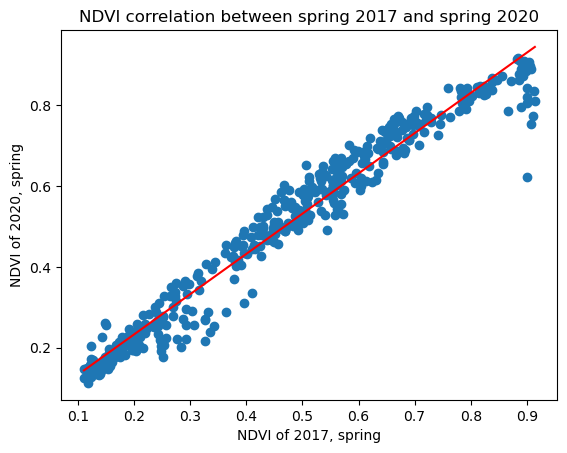

La corrélation entre la liste des coefficient NDVI de 2017 et la liste des coefficient NDVI de 2020 est : 0.98


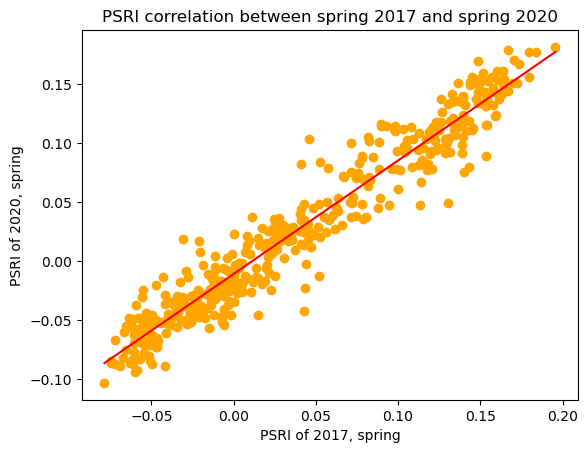

La corrélation entre la liste des coefficient PSRI de 2017 et la liste des coefficient PSRI de 2020 est : 0.967


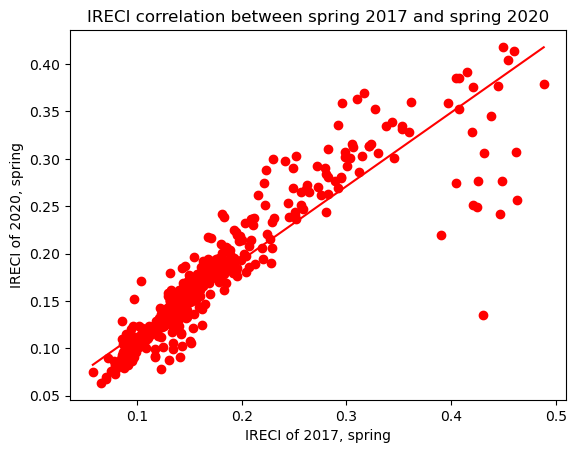

La corrélation entre la liste des coefficient IRECI de 2017 et la liste des coefficient IRECI de 2020 est : 0.914


In [36]:
ndvi_17_spring=[]
ndvi_20_spring=[]
PSRI_20_spring=[]
PSRI_17_spring=[]
IRECI_17_spring=[]
IRECI_20_spring=[]
for i in range(len(liste)):
    for j in range(len(bande_rouge_16_spring[i])):
        ndvi_17_spring.append( (bande_infrarouge_17_spring[i][j] - bande_rouge_17_spring[i][j]) / (bande_infrarouge_17_spring[i][j] + bande_rouge_17_spring[i][j]))
        ndvi_20_spring.append((bande_infrarouge_20_spring[i][j] - bande_rouge_20_spring[i][j]) / (bande_infrarouge_20_spring[i][j] + bande_rouge_20_spring[i][j]))
        PSRI_20_spring.append((bande_rouge_20_spring[i][j]-bande_verte_20_spring[i][j])/bande_infrarouge_20_spring[i][j])
        PSRI_17_spring.append((bande_rouge_17_spring[i][j]-bande_verte_17_spring[i][j])/bande_infrarouge_17_spring[i][j])
        IRECI_20_spring.append((bande_infrarouge_20_spring[i][j] - bande_rouge_20_spring[i][j])/(bande_RE1_20_spring[i][j]/bande_RE2_20_spring[i][j]))
        IRECI_17_spring.append((bande_infrarouge_17_spring[i][j] - bande_rouge_17_spring[i][j])/(bande_RE1_17_spring[i][j]/bande_RE2_17_spring[i][j]))

Corr_matrixNDVI=np.corrcoef(ndvi_17_spring,ndvi_20_spring)
Corr_matrixPSRI=np.corrcoef(PSRI_17_spring,PSRI_20_spring)
Corr_matrixIRECI=np.corrcoef(IRECI_17_spring,IRECI_20_spring)

ndvi_17_spring=np.array(ndvi_17_spring)
ndvi_20_spring=np.array(ndvi_20_spring)
coefficients_ndvi_17_20 = np.polyfit(ndvi_17_spring, ndvi_20_spring, 1)
x_reg_ndvi_17_20 = np.linspace(ndvi_17_spring.min(), ndvi_17_spring.max(), len(ndvi_17_spring))
y_reg_ndvi_17_20 = np.polyval(coefficients_ndvi_17_20, x_reg_ndvi_17_20)

plt.scatter(ndvi_17_spring,ndvi_20_spring)
plt.plot(x_reg_ndvi_17_20, y_reg_ndvi_17_20, color='r')
plt.xlabel('NDVI of 2017, spring')
plt.ylabel('NDVI of 2020, spring')
plt.title('NDVI correlation between spring 2017 and spring 2020')
plt.show()
CorrNDVI=round(Corr_matrixNDVI[0,1],3)
print("La corrélation entre la liste des coefficient NDVI de 2017 et la liste des coefficient NDVI de 2020 est :", CorrNDVI)

PSRI_17_spring=np.array(PSRI_17_spring)
PSRI_20_spring=np.array(PSRI_20_spring)
coefficients_psri_17_20 = np.polyfit(PSRI_17_spring, PSRI_20_spring, 1)
x_reg_PSRI_17_20 = np.linspace(PSRI_17_spring.min(), PSRI_17_spring.max(), len(PSRI_17_spring))
y_reg_PSRI_17_20 = np.polyval(coefficients_psri_17_20, x_reg_PSRI_17_20)

plt.scatter(PSRI_17_spring,PSRI_20_spring,c='orange')
plt.plot(x_reg_PSRI_17_20, y_reg_PSRI_17_20, color='r')
plt.xlabel('PSRI of 2017, spring')
plt.ylabel('PSRI of 2020, spring')
plt.title('PSRI correlation between spring 2017 and spring 2020')
plt.show()
CorrPSRI=round(Corr_matrixPSRI[0,1],3)
print("La corrélation entre la liste des coefficient PSRI de 2017 et la liste des coefficient PSRI de 2020 est :", CorrPSRI)

IRECI_17_spring=np.array(IRECI_17_spring)
IRECI_20_spring=np.array(IRECI_20_spring)
coefficients_IRECI_17_20 = np.polyfit(IRECI_17_spring, IRECI_20_spring, 1)
x_reg_IRECI_17_20 = np.linspace(IRECI_17_spring.min(), IRECI_17_spring.max(), len(IRECI_17_spring))
y_reg_IRECI_17_20 = np.polyval(coefficients_IRECI_17_20, x_reg_IRECI_17_20)

plt.scatter(IRECI_17_spring,IRECI_20_spring,c='red')
plt.plot(x_reg_IRECI_17_20, y_reg_IRECI_17_20, color='r')
plt.xlabel('IRECI of 2017, spring')
plt.ylabel('IRECI of 2020, spring')
plt.title('IRECI correlation between spring 2017 and spring 2020')
plt.show()
CorrIRECI=round(Corr_matrixIRECI[0,1],3)
print("La corrélation entre la liste des coefficient IRECI de 2017 et la liste des coefficient IRECI de 2020 est :", CorrIRECI)
